# SDSS DR14 Data Classification with Neural Networks

## **Introduction:**
This notebook demonstrates how to build a neural network model to classify astronomical objects from sample data from the SDSS DR14.
The goal is to predict the 'class' of an object, as ethier a `STAR`, `GALAXY` or `QSO`, based on its features like `ra`, `dec`, `u`, `g`, `r`, `i` and `z`.

## **Data Loading and Exploration:**

Load the dataset using the `pandas` libary

In [1]:
import pandas as pd
#data = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

#Google Drive link
url = "https://drive.google.com/uc?id=1Pfii448H__H0qa644YhTKUG68Z8VmxLv"

# Load the CSV file
data = pd.read_csv(url)

The first few rows of the dataset can be displayed using `.head`

In [2]:
display(data.head())

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


The data's structure and summary statistics can be explored using `.info` and `.describe`

In [3]:
data.info()
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


## **Feature Selection and Target Variable:**
We will only use the following features for classification:
- `ra`: Right ascension
- `dec`: Declination
- `u`, `g`, `r`, `i`, `z`: Magnitudes in different photometric bands

We define a new varible `X` which is the dataset cut to only include these features

The target column, `class`, that represents the type of astronomical object is set to a new varible `Y`.


In [4]:
# Define features and target
features = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z']  # List of feature column names
target = 'class'  # Target column name

# Extract features and target from the dataset
X = data[features]  # Features (input data)
Y = data[target]    # Target (output labels)

## **Encoding Target Variable:**
The target variable `class` is categorical. We need to encode it into numerical values using `LabelEncoder` from `sklearn`. This is often useful in machine learning tasks where categorical labels need to be converted into a numerical format for algorithms that require numerical inputs.


In [5]:
from sklearn.preprocessing import LabelEncoder  # Import the LabelEncoder class

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the target labels (Y) into numeric values
Y = label_encoder.fit_transform(Y)

## **Normalising features:**
We use `StandardScaler` from `sklearn` to standardise the features. This normalisation scales the features to have a mean of 0 and a standard deviation of 1, reducing the NN over-sensitivity on certain features.

In [6]:
from sklearn.preprocessing import StandardScaler  # Import the StandardScaler class

# Initialize the standard scaler
scaler = StandardScaler()

# Standardize the features (X) to have a mean of 0 and a standard deviation of 1
X = scaler.fit_transform(X)


## **Data Splitting:**

We split the data into training and testing sets so that the decison tree model performance is evaluated on unseen data.
- 80% of the data is used for model training.
- 20% of the data is used for model testing.
- `random_state` ensures reproducibility.

We use the `sklearn.model_selection` module to slit the data set into training and testing subsets. Where `test_size=0.2` specifies the proportion of the dataset to include in the test split and `random_state=42` sets an arbitrary seed value used to initialize the random number generator used to slipt the dataset in a reproducible way.

In [7]:
from sklearn.model_selection import train_test_split  # Import data splitting function

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # 80% train, 20% test


Convert the datasets into tensors, necessary to feed the data into the PyTorch model for training and evaluation.

In [8]:
import torch  # Import the PyTorch library

# Convert features (training and testing) to PyTorch tensors with data type float32
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Training features
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)    # Testing features

# Convert labels (training and testing) to PyTorch tensors with data type long
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)  # Training labels
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)    # Testing labels


## **Dataset Class and DataLoader:**
Using PyTorch's `TensorDataset` and `DataLoader` we can batch the data efficiently during training and testing:
- **`TensorDataset`**: Combines features and labels into a single dataset object that can be used with a `DataLoader`.
- **`DataLoader`**: Loads the data into batches of a set size of 64, with optional shuffling for the training data.

- **Shuffling**: Enabled for the training loader; ensures randomisation, improving the generalisation of the model.

In [9]:
from torch.utils.data import TensorDataset, DataLoader  # Import PyTorch utilities for datasets and data loading

# Create TensorDatasets from tensors (features and labels)
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)  # Training dataset
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)     # Testing dataset

# Set batch size
batch_size = 64

# Create DataLoaders for batching and more efficient data handling
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # Training data loader with shuffling
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)  # Testing data loader without shuffling



## **Building the Neural Network Model:**
To define and initialise a simple feedforward NN for classification we implemnt PyTorch's `torch.nn` module:

- **Class Definition**: `SDSSClassifier` model includes an input layer, one hidden layer, and an output layer. The layers are combined in a sequential block with the standard activation function (`ReLU`) applied to the hidden layer.

- **Forward Pass**: Defines how the input data flows through the layers to produce predictions.

- **Model Parameters**:
    - `input_dim`: The number of input features (determined from the training data).
    - `hidden_dim`: The number of neurons in the hidden layer (set to 64).
    - `output_dim`: The number of output classes (determined from the label encoder).

In [10]:
import torch.nn as nn  # Import PyTorch's neural network module

# Define a feedforward neural network model
class SDSSClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SDSSClassifier, self).__init__()  # Initialize the base class
        # Define a sequential block with input, hidden, and output layers
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),  # Input layer to hidden layer
            nn.ReLU(),                         # Activation function for hidden layer
            nn.Linear(hidden_dim, output_dim)  # Hidden layer to output layer
        )

    def forward(self, x):
        # Define the forward pass of network
        return self.fc(x)

# Define model parameters
input_dim = X_train.shape[1]  # Number of features in the input data
hidden_dim = 64               # Number of neurons in the hidden layer
output_dim = len(label_encoder.classes_)  # Number of output classes (based on label encoding)

# Instantiate the model with the specified parameters
model = SDSSClassifier(input_dim, hidden_dim, output_dim)


## **Loss Function and Optimiser:**
We define the loss function and model optimiser, components needed to train the neural network. `nn.CrossEntropyLoss()` is used for multi-class classification tasks, computing the loss between the predicted classes and the true labels.
We implement a widely used (built-in) optimiser `optim.Adam` that adjusts the learning rate (`lr=0.001`) during training. Both components are critical for guiding the model's weights during training.


In [11]:
import torch.optim as optim  # Import PyTorch's optimisation library

# Define the loss function
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification

# Define the optimiser
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimiser with a learning rate of 0.001


## **Training the Model:**
We now train the model for 10 epochs. During each epoch, the model processes batches from the `train_loader`, computes the class predictions, calculates the loss using `CrossEntropyLoss`, and updates weights using the Adam optimiser. With each epoch, progress can be monitored with the average loss.

In [12]:
# Train the Model
num_epochs = 10  # Number of epochs for training

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0  # Initialise total loss for the current epoch

    # Iterate through batches of data
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients from previous step
        outputs = model(inputs)  # Perform forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Perform backward pass to compute gradients
        optimizer.step()  # Update the model's weights
        total_loss += loss.item()  # Accumulate loss for the epoch

    # Records average loss for current epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader):.4f}")

print("Model training completed.")


Epoch 1/10, Loss: 0.8293
Epoch 2/10, Loss: 0.6104
Epoch 3/10, Loss: 0.5350
Epoch 4/10, Loss: 0.4769
Epoch 5/10, Loss: 0.4238
Epoch 6/10, Loss: 0.3837
Epoch 7/10, Loss: 0.3538
Epoch 8/10, Loss: 0.3325
Epoch 9/10, Loss: 0.3168
Epoch 10/10, Loss: 0.3053
Model training completed.


## **Saving the Model:**
The model's (trained) parameters can be saved using `torch.save` to allow the model to be reloaded if needeed.

In [13]:
# Save the Model
torch.save(model.state_dict(), 'sdss_classifier.pth') # Saves the model to a set file
print("Model saved as 'sdss_classifier.pth'")

Model saved as 'sdss_classifier.pth'


## **Model Evaluation:**
We will evaluate the model using the following metrics:
- **Accuracy:** Percentage of correctly classified instances.
- **Classification Report:** Provides precision, recall, F1-score, and support for each class.
- **Confusion Matrix:** Visualizes the distribution of correct and incorrect predictions.

In [14]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay  # Import evaluation metrics

# Evaluate the Model
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():  # No need to calculate gradients during evaluation
    for inputs, labels in test_loader:
        outputs = model(inputs)   # Forward pass
        _, preds = torch.max(outputs, 1)  # Get class predictions
        all_preds.extend(preds.numpy())   # Store predictions
        all_labels.extend(labels.numpy()) # Store true labels


Accuracy

In [15]:
# Calculate the accuracy of the model
accuracy = accuracy_score(all_labels, all_preds)  # Compare all predicted labels to true labels
print(f"Accuracy: {accuracy:.2f}")   # Return accuracy rounded to two decimal places

Accuracy: 0.92


Classification Report

In [16]:
# Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.95      0.90      0.93       996
         QSO       0.93      0.86      0.89       190
        STAR       0.88      0.95      0.92       814

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



Confusion Matrix

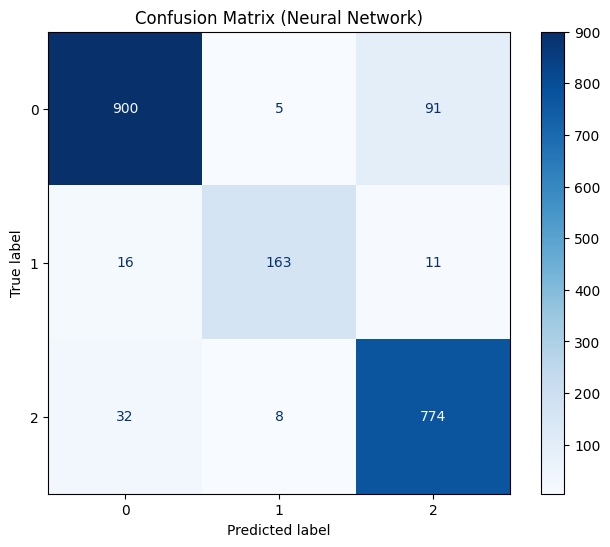

In [17]:
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Confusion matrix visualization using from_predictions
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(all_labels, all_preds, cmap=plt.cm.Blues, ax=ax)
ax.set_title("Confusion Matrix (Neural Network)")
plt.show()


## **Comparative Histograms:**

We can compare the distribution of predicted classes with the true class distribution using histograms.
This helps visualize how well the model captures the underlying patterns in the data. 

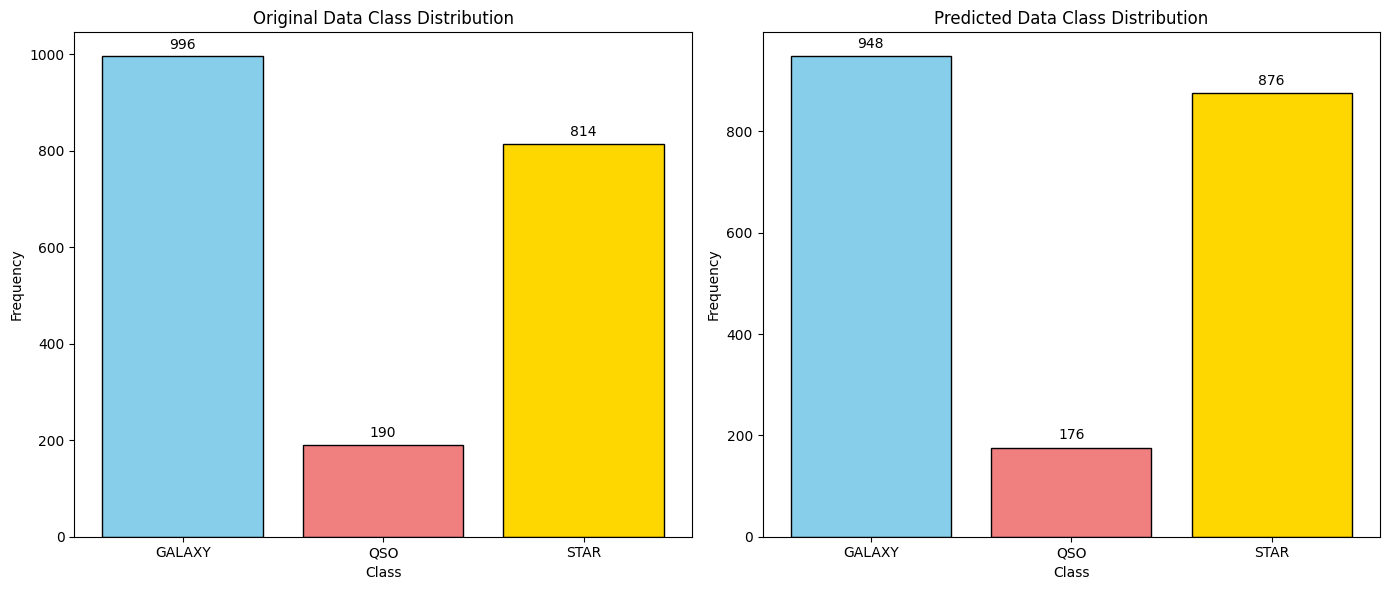

In [18]:
import numpy as np

# Decode numeric class labels back to original class names
decoded_labels = label_encoder.inverse_transform(all_labels)
decoded_preds = label_encoder.inverse_transform(all_preds)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define class order and colors
class_order = label_encoder.classes_  # ['GALAXY', 'QSO', 'STAR'] as determined by LabelEncoder
colors = ['skyblue', 'lightcoral', 'gold']

# Original Data Distribution
unique_classes, counts = np.unique(decoded_labels, return_counts=True)
class_counts = dict(zip(unique_classes, counts))  # Create a dictionary mapping classes to counts
ordered_counts = [class_counts.get(cls, 0) for cls in class_order]  # Get counts in the desired order
axes[0].bar(class_order, ordered_counts, color=colors, width=0.8, edgecolor='black')
axes[0].set_title("Original Data Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Frequency")

# Predicted Data Distribution
unique_classes, counts = np.unique(decoded_preds, return_counts=True)
class_counts = dict(zip(unique_classes, counts))  # Create a dictionary mapping classes to counts
ordered_counts = [class_counts.get(cls, 0) for cls in class_order]  # Get counts in the desired order
axes[1].bar(class_order, ordered_counts, color=colors, width=0.8, edgecolor='black')
axes[1].set_title("Predicted Data Class Distribution")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Frequency")

# Add labels to bars
for ax in axes:
    for i, rect in enumerate(ax.patches):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 10, f"{height:.0f}",
                ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()


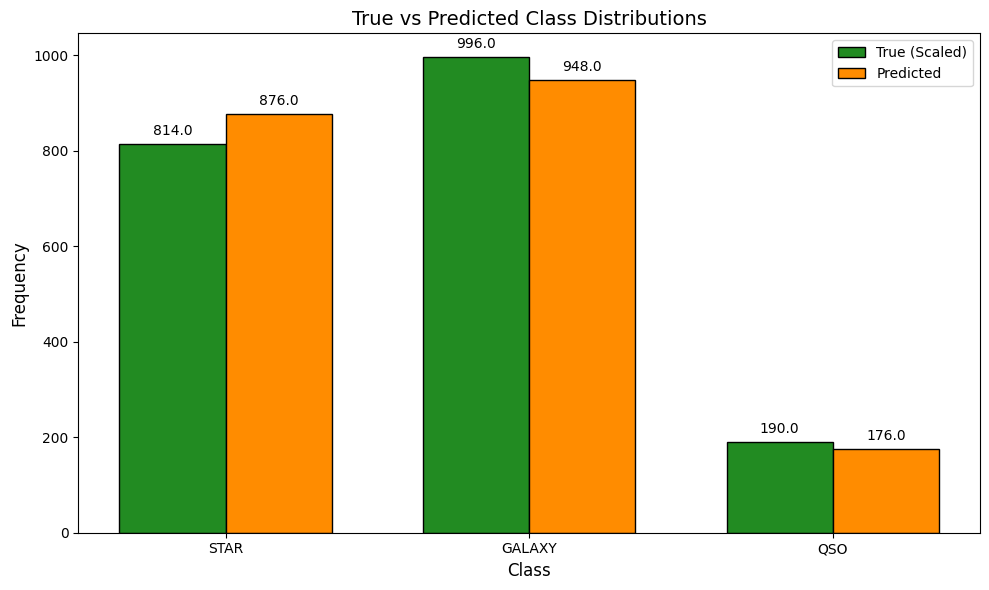

In [25]:
# Compute true and predicted counts
true_counts_scaled = dict(zip(*np.unique(decoded_labels, return_counts=True)))
pred_counts = dict(zip(*np.unique(decoded_preds, return_counts=True)))

# Define class order and colors
class_order = ['STAR', 'GALAXY', 'QSO']
colors = ['forestgreen', 'darkorange']

# Prepare data
true_ordered_scaled = [true_counts_scaled.get(cls, 0) for cls in class_order]
pred_ordered = [pred_counts.get(cls, 0) for cls in class_order]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
x = np.arange(len(class_order))

# Plot histograms for scaled true values and predicted values
ax.bar(x - bar_width / 2, true_ordered_scaled, bar_width, label='True (Scaled)', color=colors[0], edgecolor='black')
ax.bar(x + bar_width / 2, pred_ordered, bar_width, label='Predicted', color=colors[1], edgecolor='black')

# Add labels, title, and legend
ax.set_title('True vs Predicted Class Distributions', fontsize=14)
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(class_order)
ax.legend()

# Add values on bars
for i, value in enumerate(true_ordered_scaled):
    ax.text(i - bar_width / 2, value + max(pred_ordered) * 0.02, f"{value:.1f}", ha='center', fontsize=10)
for i, value in enumerate(pred_ordered):
    ax.text(i + bar_width / 2, value + max(pred_ordered) * 0.02, f"{value:.1f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()



## **Feature Importance:**

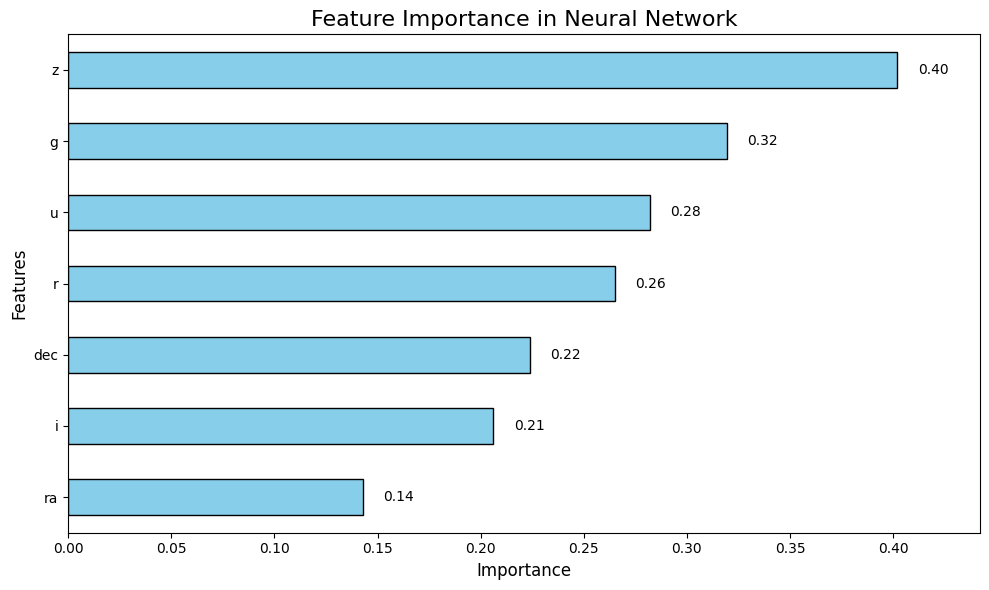

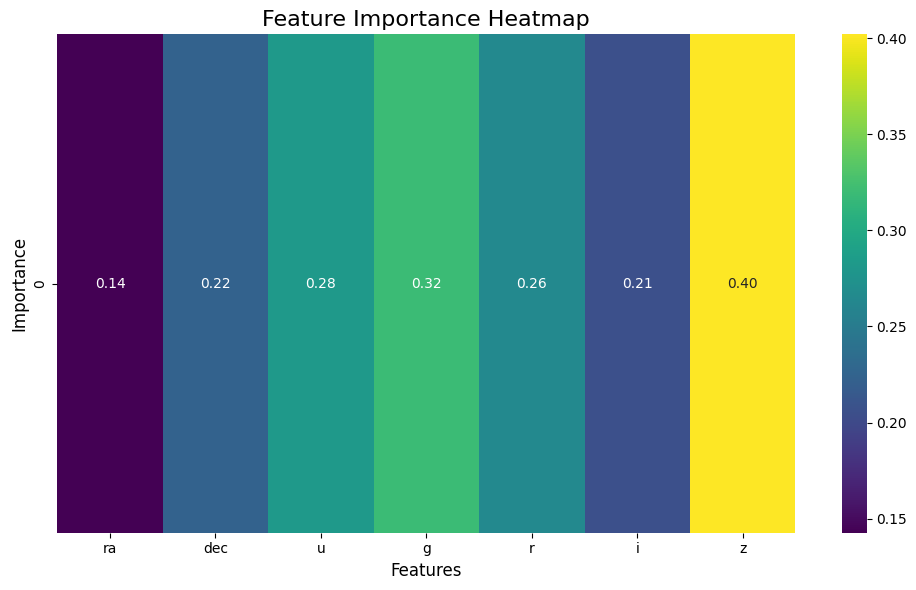

In [20]:
# Extract the weights of the first layer of the neural network
input_weights = model.fc[0].weight.detach().numpy()

# Calculate the mean absolute weight for each feature
feature_importances = np.mean(np.abs(input_weights), axis=0)

# Create a pandas Series for feature importances
feature_importances = pd.Series(feature_importances, index=features)

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Feature Importance in Neural Network', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.gca().invert_yaxis()  # Show most important features at the top

# Adjust x-axis limits to ensure all text fits within the plot
plt.xlim(0, feature_importances.max() * 1.1)  # Add 10% padding to the maximum value

# Annotate bars with importance values
for index, value in enumerate(feature_importances):
    annotation_position = min(value + 0.01, feature_importances.max() * 1.05)
    plt.text(annotation_position, index, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

#Heatmap of features
import seaborn as sns

# Match weights to original feature order
original_feature_order = features  # The original feature order
original_order_weights = pd.Series([feature_importances[feature] for feature in original_feature_order], 
                                    index=original_feature_order)

# Convert to DataFrame for the heatmap
importance_df_original_order = original_order_weights.to_frame().T

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(importance_df_original_order, annot=True, cmap='viridis', cbar=True, fmt='.2f')
plt.title('Feature Importance Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.tight_layout()
plt.show()





## **Comparison to Decision Tree:**

- **Accuracy:** The Neural Network approach achieved an accuracy of 92%, while the basic Decision Tree approach (without any optimisations) achieved 77%.

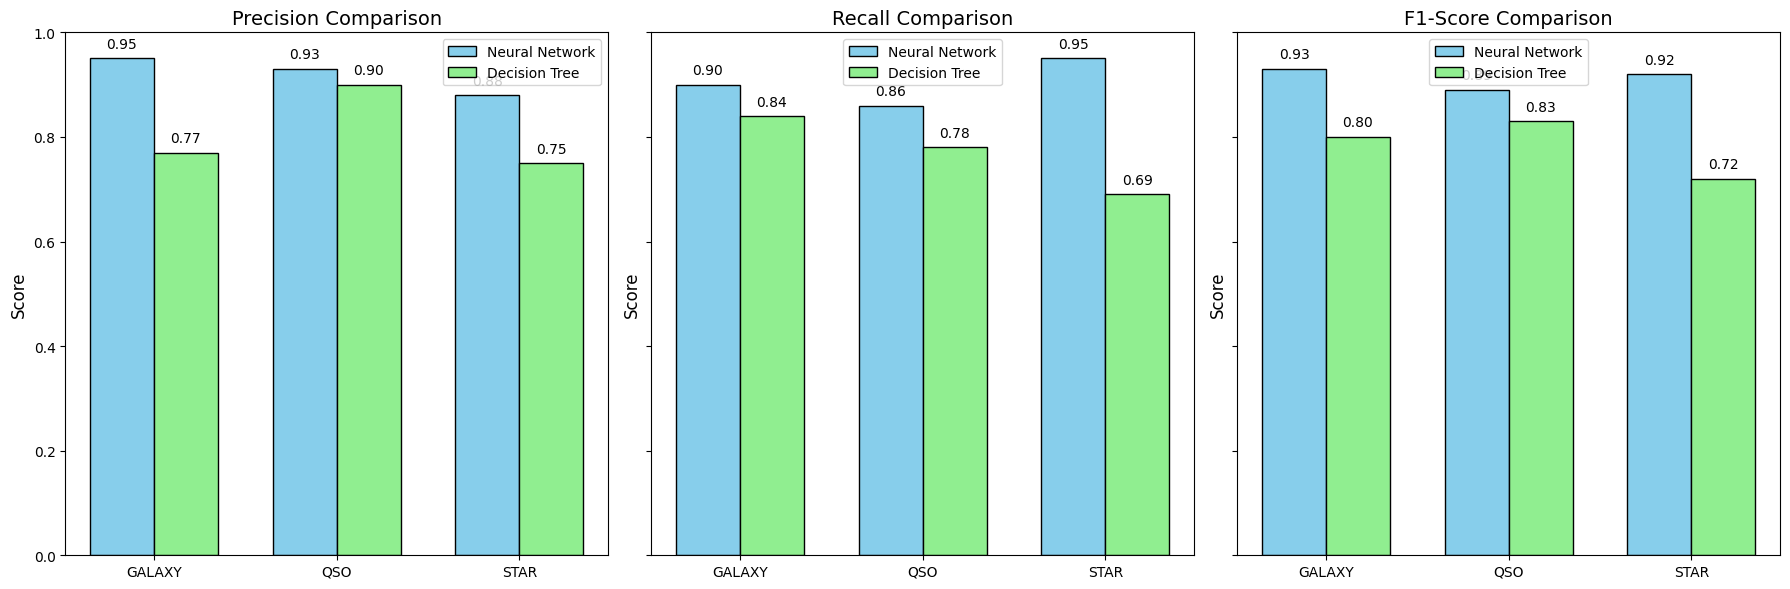

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for Neural Network and Decision Tree
classes = ['GALAXY', 'QSO', 'STAR']
nn_metrics = {
    'Precision': [0.95, 0.93, 0.88],
    'Recall': [0.90, 0.86, 0.95],
    'F1-Score': [0.93, 0.89, 0.92]
}
dt_metrics = {
    'Precision': [0.77, 0.90, 0.75],
    'Recall': [0.84, 0.78, 0.69],
    'F1-Score': [0.80, 0.83, 0.72]
}
# Create the plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
bar_width = 0.35
x = np.arange(len(classes))

for i, metric in enumerate(nn_metrics.keys()):
    ax = axes[i]
    ax.bar(x - bar_width/2, nn_metrics[metric], bar_width, label='Neural Network', color='skyblue', edgecolor='black')
    ax.bar(x + bar_width/2, dt_metrics[metric], bar_width, label='Decision Tree', color='lightgreen', edgecolor='black')
    ax.set_title(f'{metric} Comparison', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_ylim(0, 1.0)
    ax.legend()
    
    # Add values on top of bars
    for j, v in enumerate(nn_metrics[metric]):
        ax.text(j - bar_width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    for j, v in enumerate(dt_metrics[metric]):
        ax.text(j + bar_width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


- **Overall Performance**:
  - The **Neural Network (NN)** outperforms the **Decision Tree (DT)** in all metrics, achieving higher accuracy, precision, recall, and F1-scores across all classes.

- **Class-Level Metrics**:
  - For the **GALAXY** class:
    - NN achieves **higher precision (0.95)** compared to DT's **0.77**, meaning NN produces fewer false positives.
    - NN has a slightly lower recall (**0.90**) than DT's **0.84**, indicating it identifies more true positives.
  - For the **QSO** class:
    - NN has **higher recall (0.86)** compared to DT's **0.78**, meaning NN captures more true positives for this class.
    - Precision is slightly higher for NN (**0.93**) compared to DT (**0.90**).
  - For the **STAR** class:
    - NN excels with **precision (0.88)** and **recall (0.95)**, both significantly higher than DT's **0.75 (precision)** and **0.69 (recall)**.

- **Weighted and Macro Averages**:
  - The **NN's weighted averages** for precision, recall, and F1-scores are consistently around **0.91**, indicating a balanced performance across all classes.
  - The DT's weighted averages are significantly lower at **0.77**, reflecting reduced performance consistency.

- **Model Selection Insights**:
  - The NN demonstrates superior capability in handling imbalanced data and complex patterns, making it a better choice for this classification task.
  - The DT may be more interpretable, but its reduced performance highlights its limitations in capturing intricate relationships in the data.

- **Practical Implications**:
  - For scenarios requiring high precision (e.g., reducing false positives in classification), the NN is clearly more suitable.
  - If computational simplicity or interpretability is more critical, the DT may still be considered, but at the cost of performance.


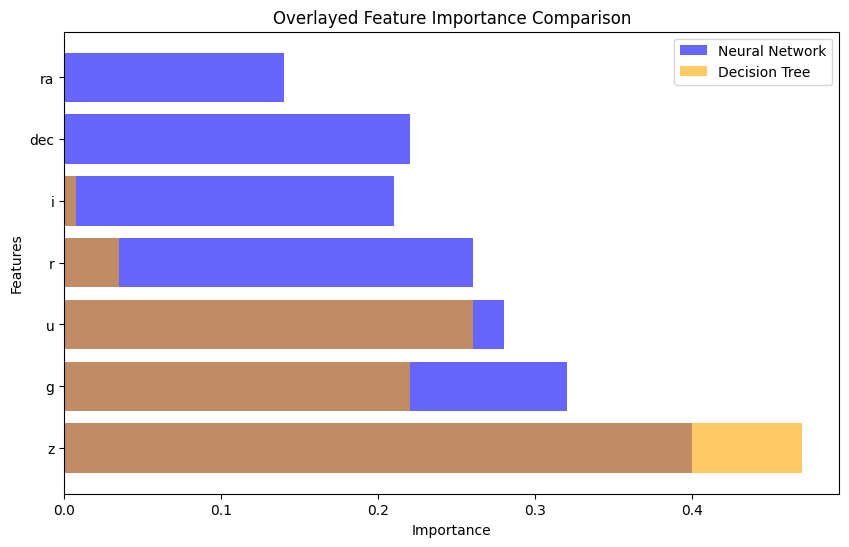

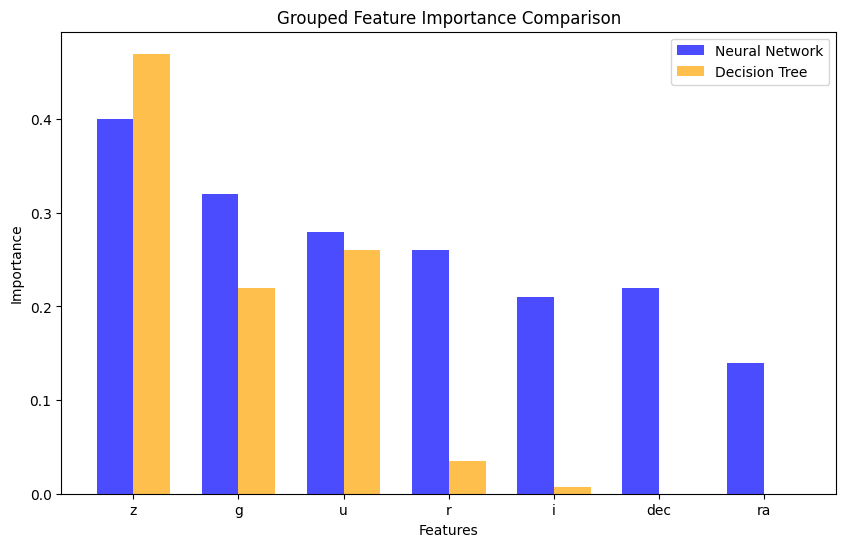

In [ ]:
# Feature names and their importance values for both models
features = ['z', 'g', 'u', 'r', 'i', 'dec', 'ra']
importance_nn = [0.40, 0.32, 0.28, 0.26, 0.21, 0.22, 0.14]
importance_dt = [0.47, 0.22, 0.26, 0.035, 0.0074, 0.00, 0.00]

# Overlayed Bar Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importance_nn, color='blue', alpha=0.6, label='Neural Network')
plt.barh(features, importance_dt, color='orange', alpha=0.6, label='Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Overlayed Feature Importance Comparison')
plt.legend()
plt.show()

# Grouped Bar Plot
x = np.arange(len(features))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, importance_nn, width, label='Neural Network', color='blue', alpha=0.7)
plt.bar(x + width/2, importance_dt, width, label='Decision Tree', color='orange', alpha=0.7)
plt.xticks(ticks=x, labels=features)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Grouped Feature Importance Comparison')
plt.legend()
plt.show()

The NN has a much greater spread of importance between features over the DT. This suggests the NN would works better generally and is much more likely to perform well on different datasets. The NN also seems to include the positional data points too, whereas the DT has such a heavy reliance on the `z` mag feature that it causes some of the overfitting between galaxies and stars that we see in Q1 notebook.

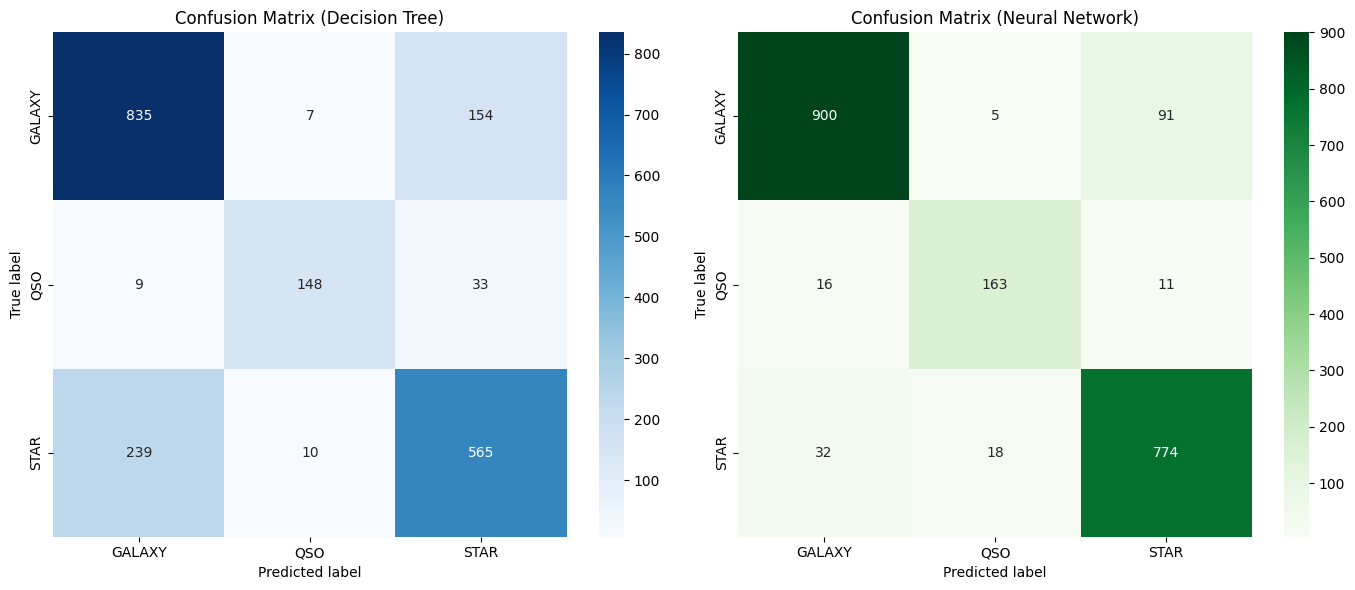

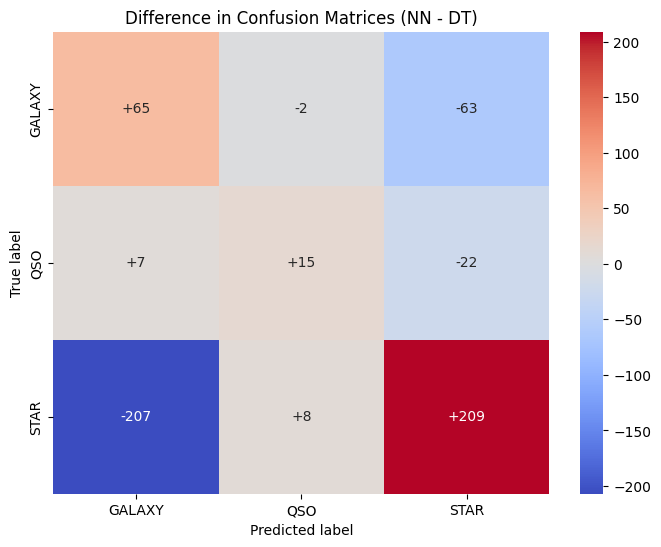

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Example confusion matrices
cm_dt = np.array([[835, 7, 154],  # Decision Tree
                  [9, 148, 33],
                  [239, 10, 565]])

cm_nn = np.array([[900, 5, 91],  # Neural Network (example values)
                  [16, 163, 11],
                  [32, 18, 774]])

labels = ['GALAXY', 'QSO', 'STAR']

# Side-by-Side Heatmaps
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.subplot(1, 2, 2)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

# Difference Heatmap
cm_diff = cm_nn - cm_dt

plt.figure(figsize=(8, 6))
sns.heatmap(cm_diff, annot=True, fmt='+d', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title('Difference in Confusion Matrices (NN - DT)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## **Conclusion:**
Comparing the confusion matrices we see that the NN is significatly better at predicting `STAR` correctly over the overfit `GALAXY` predictions seen from the DT. It is also clear (strong positive correlation diagonally) that overall the NN is notably more accurate at the classification of all the astrophysical objects in the SDSS DR14 dataset. Therefore, despite the slightly more-in-depth implementation steps for the neural network, even the most simple model with hyperparameters `epoch=10` and a `batch_size=64` can outperform the desision tree.

Further experimentation with different NN hyperparameters and pre-training is explored in the Q3 notebook to determine the optimum set-up conditions for the model, fine-tuning the cruial parmeters required to acheive an even better testing accuracy for our NN. 